In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales/index_2.csv
/kaggle/input/coffee-sales/index_1.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('/kaggle/input/coffee-sales/index_1.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [6]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB
None


In [7]:
# Convert 'date' column to datetime if needed
df['date'] = pd.to_datetime(df['date'])

# Fill missing values if any (simplest way)
df.fillna(0, inplace=True)

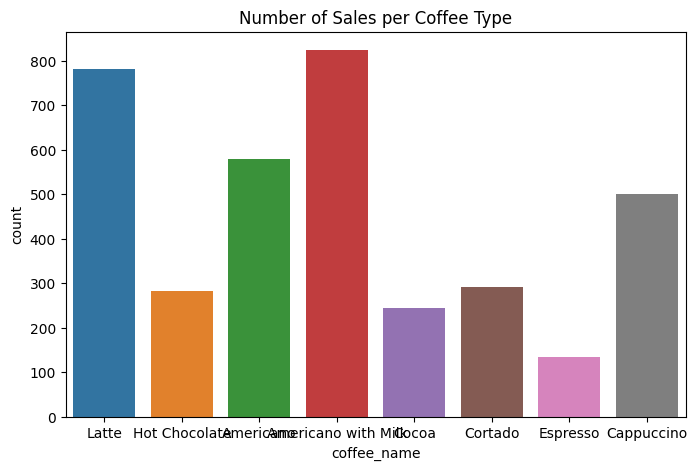

In [8]:
# Plot total sales by coffee name
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='coffee_name')
plt.title('Number of Sales per Coffee Type')
plt.show()

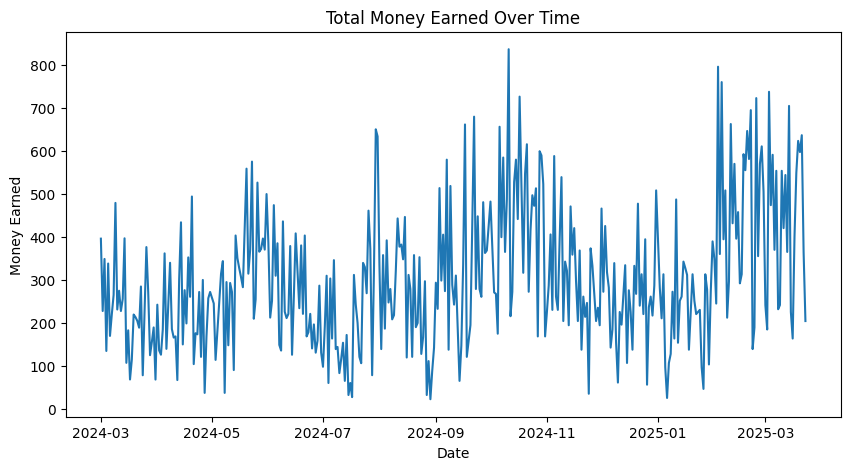

In [9]:
# Plot sales over time (money earned per date)
daily_sales = df.groupby('date')['money'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(daily_sales['date'], daily_sales['money'])
plt.title('Total Money Earned Over Time')
plt.xlabel('Date')
plt.ylabel('Money Earned')
plt.show()

In [10]:
# Convert categories to numbers
df['coffee_name_code'] = df['coffee_name'].astype('category').cat.codes
df['cash_type_code'] = df['cash_type'].astype('category').cat.codes

# Extract date features
df['day_of_week'] = df['date'].dt.dayofweek

In [11]:
# Select features and target
X = df[['coffee_name_code', 'cash_type_code', 'day_of_week', 'card', 'money']]  # Including card (amount paid by card) might be redundant with 'money', so let's skip 'money' from features
X = df[['coffee_name_code', 'cash_type_code', 'day_of_week', 'card']]
y = df['money']

In [12]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Convert categorical variables to dummy/indicator variables
X_train_encoded = pd.get_dummies(X_train)

# Now fit the model with the encoded features
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=42)

In [14]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [15]:
y_pred = model.predict(X_test_encoded)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 2.47
R^2 Score: 0.90


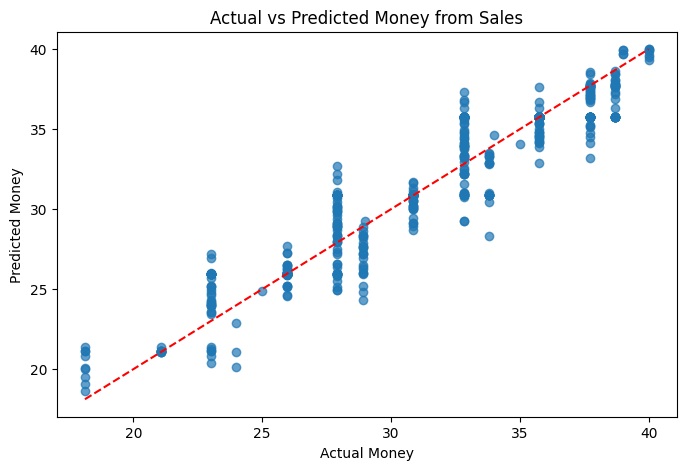

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Money')
plt.ylabel('Predicted Money')
plt.title('Actual vs Predicted Money from Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()